In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# accessing the excel file
df = pd.read_excel('marketing_campaign.xlsx')

In [3]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0


In [4]:
df.shape

(2240, 29)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2240 non-null   int64         
 1   Year_Birth           2240 non-null   int64         
 2   Education            2240 non-null   object        
 3   Marital_Status       2240 non-null   object        
 4   Income               2216 non-null   float64       
 5   Kidhome              2240 non-null   int64         
 6   Teenhome             2240 non-null   int64         
 7   Dt_Customer          2240 non-null   datetime64[ns]
 8   Recency              2240 non-null   int64         
 9   MntWines             2240 non-null   int64         
 10  MntFruits            2240 non-null   int64         
 11  MntMeatProducts      2240 non-null   int64         
 12  MntFishProducts      2240 non-null   int64         
 13  MntSweetProducts     2240 non-nul

In [6]:
df['ID'].unique()

array([5524, 2174, 4141, ..., 7270, 8235, 9405], dtype=int64)

In [7]:
df['ID'].drop_duplicates()

0        5524
1        2174
2        4141
3        6182
4        5324
        ...  
2235    10870
2236     4001
2237     7270
2238     8235
2239     9405
Name: ID, Length: 2240, dtype: int64

In [8]:
df['Year_Birth']

0       1957
1       1954
2       1965
3       1984
4       1981
        ... 
2235    1967
2236    1946
2237    1981
2238    1956
2239    1954
Name: Year_Birth, Length: 2240, dtype: int64

In [9]:
Current_year = 2025
df['Age'] =  Current_year - df['Year_Birth'] 

In [10]:
df['Age']

0       68
1       71
2       60
3       41
4       44
        ..
2235    58
2236    79
2237    44
2238    69
2239    71
Name: Age, Length: 2240, dtype: int64

In [11]:
df['Age'].isnull().sum()

0

<Axes: >

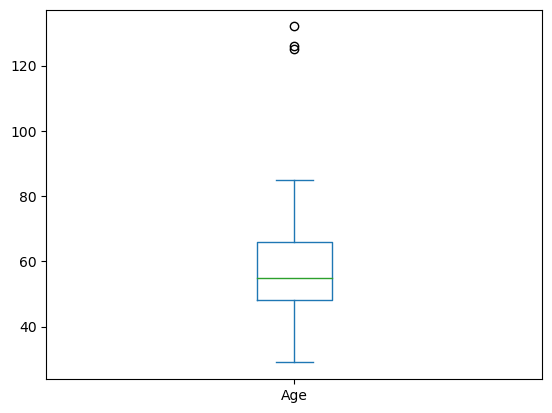

In [12]:
df['Age'].plot(kind ='box')

In [13]:
df['Age'].skew()

0.34994385918267057

In [14]:
df[df['Age']>= 100]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age
192,7829,1900,2n Cycle,Divorced,36640.0,1,0,2013-09-26,99,15,...,0,0,0,0,0,1,3,11,0,125
239,11004,1893,2n Cycle,Single,60182.0,0,1,2014-05-17,23,8,...,0,0,0,0,0,0,3,11,0,132
339,1150,1899,PhD,Together,83532.0,0,0,2013-09-26,36,755,...,0,0,1,0,0,0,3,11,0,126


In [15]:
df = df[df['Age'] <= 120]

In [16]:
df['Age'].describe()

count    2237.000000
mean       56.098346
std        11.701917
min        29.000000
25%        48.000000
50%        55.000000
75%        66.000000
max        85.000000
Name: Age, dtype: float64

In [17]:
df['Age'].skew()

0.09326627359499409

In [18]:
df['Education']

0       Graduation
1       Graduation
2       Graduation
3       Graduation
4              PhD
           ...    
2235    Graduation
2236           PhD
2237    Graduation
2238        Master
2239           PhD
Name: Education, Length: 2237, dtype: object

In [19]:
df['Education'].value_counts()

Education
Graduation    1127
PhD            485
Master         370
2n Cycle       201
Basic           54
Name: count, dtype: int64

<Axes: xlabel='Education'>

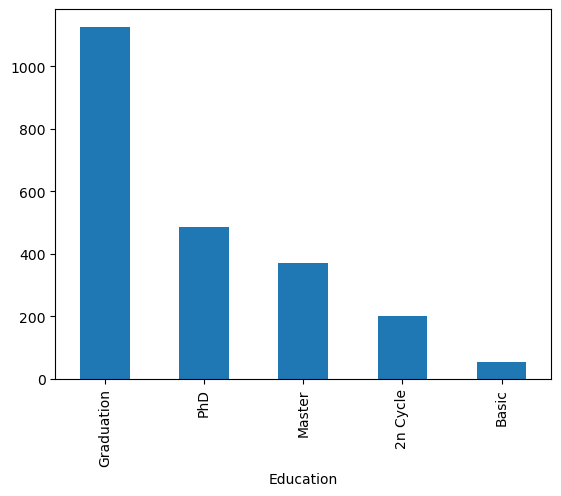

In [20]:
df['Education'].value_counts().plot(kind='bar')

In [21]:
df['Education_nums'] = df['Education'].replace({
    'Graduation': 0,
    'PhD': 1,
    'Master': 2,
    '2n Cycle': 3,
    'Basic': 4
})


C:\Users\JOSHUAVIJAYA\AppData\Local\Temp\ipykernel_8140\2967853411.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Education_nums'] = df['Education'].replace({


In [22]:
df.shape

(2237, 31)

In [23]:
df['Education_nums'].describe()

count    2237.000000
mean        0.913724
std         1.113093
min         0.000000
25%         0.000000
50%         0.000000
75%         2.000000
max         4.000000
Name: Education_nums, dtype: float64

In [24]:
df['Education_nums'].info()

<class 'pandas.core.series.Series'>
Index: 2237 entries, 0 to 2239
Series name: Education_nums
Non-Null Count  Dtype
--------------  -----
2237 non-null   int64
dtypes: int64(1)
memory usage: 35.0 KB


In [25]:
df['Education_nums'].value_counts()

Education_nums
0    1127
1     485
2     370
3     201
4      54
Name: count, dtype: int64

In [26]:
df['Education_nums'].isnull().sum()

0

In [27]:
df['Marital_Status'].describe()

count        2237
unique          8
top       Married
freq          864
Name: Marital_Status, dtype: object

In [28]:
df['Marital_Status'].isnull().sum()

0

In [29]:
df['Marital_Status'].value_counts()

Marital_Status
Married     864
Together    579
Single      479
Divorced    231
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64

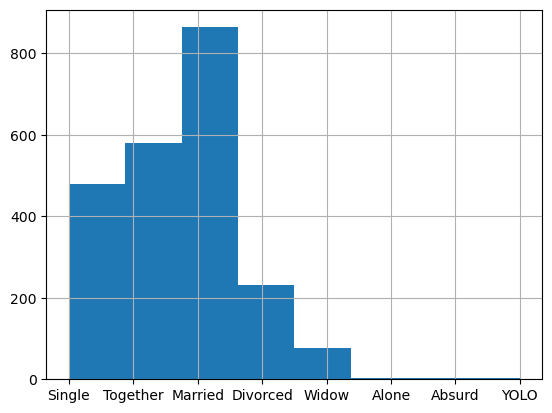

In [30]:
hist = df['Marital_Status'].hist(bins=8)

In [31]:
Marital_map = {
    'Married' : 0,    
    'Together' : 1,
    'Single' : 3,
    'Divorced' : 4,
    'Widow' : 5,
    'Alone' : 6,
    'Absurd' : 7,
    'YOLO' : 8 
}

df['Marital_Status_nums'] = df['Marital_Status'].map(Marital_map)


In [32]:
df['Marital_Status_nums']

0       3
1       3
2       1
3       1
4       0
       ..
2235    0
2236    1
2237    4
2238    1
2239    0
Name: Marital_Status_nums, Length: 2237, dtype: int64

In [33]:
df['Marital_Status_nums'].value_counts()

Marital_Status_nums
0    864
1    579
3    479
4    231
5     77
6      3
7      2
8      2
Name: count, dtype: int64

In [34]:
df['Marital_Status_nums'].isnull().sum()

0

In [35]:
df['Income'].describe()

count      2213.000000
mean      52236.581563
std       25178.603047
min        1730.000000
25%       35246.000000
50%       51373.000000
75%       68487.000000
max      666666.000000
Name: Income, dtype: float64

In [36]:
df['Income'].isnull().sum()

24

In [37]:
df.groupby('Education')['Income'].mean().sort_values(ascending=False)

Education
PhD           56088.258333
Master        52917.534247
Graduation    52720.373656
2n Cycle      47625.333333
Basic         20306.259259
Name: Income, dtype: float64

In [38]:
df.groupby('Education')['Income'].median().sort_values(ascending=False)

Education
PhD           55185.0
Graduation    52028.5
Master        50943.0
2n Cycle      46805.0
Basic         20744.0
Name: Income, dtype: float64

In [39]:
df.groupby('Education')['Income'].apply(lambda x: x.isnull().sum())

Education
2n Cycle       3
Basic          0
Graduation    11
Master         5
PhD            5
Name: Income, dtype: int64

In [40]:
df['Income'].skew()

6.7687080697954904

In [41]:
skew = df['Income'].skew()

In [42]:
# Fill based on skew
if skew > 1 or skew < -1:
    df['Income'] = df.groupby('Education')['Income'].transform(lambda x: x.fillna(x.median()))
else:
    df['Income'] = df.groupby('Education')['Income'].transform(lambda x: x.fillna(x.mean()))

In [43]:
df['Income'].isnull().sum()

0

<Axes: >

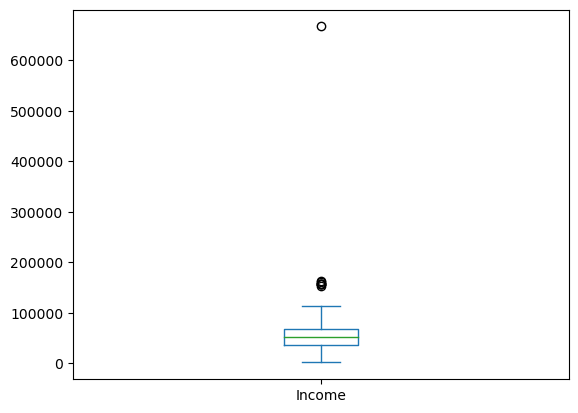

In [44]:
df['Income'].plot(kind = 'box')

In [45]:
df[df['Income'] > 150000]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Education_nums,Marital_Status_nums
164,8475,1973,PhD,Married,157243.0,0,1,2014-03-01,98,20,...,0,0,0,0,3,11,0,52,1,0
617,1503,1976,PhD,Together,162397.0,1,1,2013-06-03,31,85,...,0,0,0,0,3,11,0,49,1,1
655,5555,1975,Graduation,Divorced,153924.0,0,0,2014-02-07,81,1,...,0,0,0,0,3,11,0,50,0,4
687,1501,1982,PhD,Married,160803.0,0,0,2012-08-04,21,55,...,0,0,0,0,3,11,0,43,1,0
1300,5336,1971,Master,Together,157733.0,1,0,2013-06-04,37,39,...,0,0,0,0,3,11,0,54,2,1
1653,4931,1977,Graduation,Together,157146.0,0,0,2013-04-29,13,1,...,0,0,0,0,3,11,0,48,0,1
2132,11181,1949,PhD,Married,156924.0,0,0,2013-08-29,85,2,...,0,0,0,0,3,11,0,76,1,0
2233,9432,1977,Graduation,Together,666666.0,1,0,2013-06-02,23,9,...,0,0,0,0,3,11,0,48,0,1


In [46]:
df['Kidhome']

0       0
1       1
2       0
3       1
4       1
       ..
2235    0
2236    2
2237    0
2238    0
2239    1
Name: Kidhome, Length: 2237, dtype: int64

In [47]:
df['Kidhome'].value_counts()

Kidhome
0    1291
1     898
2      48
Name: count, dtype: int64

In [48]:
df['Kidhome'].isnull().sum()

0

In [49]:
df['Teenhome']

0       0
1       1
2       0
3       0
4       0
       ..
2235    1
2236    1
2237    0
2238    1
2239    1
Name: Teenhome, Length: 2237, dtype: int64

In [50]:
df['Teenhome'].value_counts()

Teenhome
0    1156
1    1029
2      52
Name: count, dtype: int64

In [51]:
# Feature Engineering 
df['TotalChildren'] = df['Kidhome'] + df['Teenhome']

In [52]:
df['TotalChildren']

0       0
1       2
2       0
3       1
4       1
       ..
2235    1
2236    3
2237    0
2238    1
2239    2
Name: TotalChildren, Length: 2237, dtype: int64

In [53]:
df['HasChildren'] = df['TotalChildren'].apply(lambda x: 1 if x > 0 else 0)

In [54]:
df['HasChildren']

0       0
1       1
2       0
3       1
4       1
       ..
2235    1
2236    1
2237    0
2238    1
2239    1
Name: HasChildren, Length: 2237, dtype: int64

In [55]:
df['Dt_Customer']  #customer enrolled date

0      2012-09-04
1      2014-03-08
2      2013-08-21
3      2014-02-10
4      2014-01-19
          ...    
2235   2013-06-13
2236   2014-06-10
2237   2014-01-25
2238   2014-01-24
2239   2012-10-15
Name: Dt_Customer, Length: 2237, dtype: datetime64[ns]

In [56]:
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])

In [57]:
# let's calculate the no. of days the customer is with organizations
df['Days_Since'] = (pd.Timestamp('today') - df['Dt_Customer']).dt.days

In [58]:
df['Days_Since']

0       4813
1       4263
2       4462
3       4289
4       4311
        ... 
2235    4531
2236    4169
2237    4305
2238    4306
2239    4772
Name: Days_Since, Length: 2237, dtype: int64

In [59]:
df['Days_Since'].describe()

count    2237.000000
mean     4503.790344
std       202.137961
min      4150.000000
25%      4331.000000
50%      4506.000000
75%      4679.000000
max      4849.000000
Name: Days_Since, dtype: float64

In [60]:
df['Days_Since'].skew()

-0.016651477393272895

<Axes: >

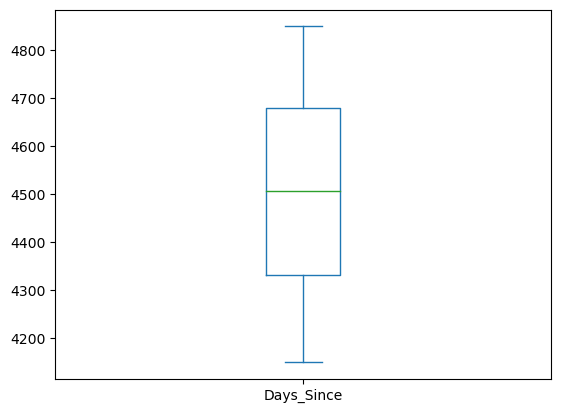

In [61]:
df['Days_Since'].plot(kind = 'box')

In [62]:
# we can use Tenure segement but the describe() shows that almost all customers are 10+ year old, so this part is useless for this dataset
# df['TenureSegment'] = pd.cut(df['Days_Since_Enrollment'],bins=[0, 365, 730, 1095, float('inf')],labels=['<1yr', '1-2yr', '2-3yr', '>3yr'])

In [63]:
df['Recency'] # Number of days since the customer's last purchase.

0       58
1       38
2       26
3       26
4       94
        ..
2235    46
2236    56
2237    91
2238     8
2239    40
Name: Recency, Length: 2237, dtype: int64

In [64]:
df['Recency'].describe()

count    2237.000000
mean       49.104604
std        28.956073
min         0.000000
25%        24.000000
50%        49.000000
75%        74.000000
max        99.000000
Name: Recency, dtype: float64

In [65]:
# unlike date since column, recency column can provide data for most active and list active customers.
# Customers with low recency (recent purchase) are more active.
# High recency → inactive or churn risk.
df['RecencySegment'] = pd.cut(df['Recency'], bins=[0,30,90,180,365, np.inf],labels=['0-30','31-90','91-180','181-365','>365'])


In [66]:
df['RecencySegment']

0        31-90
1        31-90
2         0-30
3         0-30
4       91-180
         ...  
2235     31-90
2236     31-90
2237    91-180
2238      0-30
2239     31-90
Name: RecencySegment, Length: 2237, dtype: category
Categories (5, object): ['0-30' < '31-90' < '91-180' < '181-365' < '>365']

In [67]:
df['RecencySegment'].value_counts()

RecencySegment
31-90      1317
0-30        695
91-180      197
181-365       0
>365          0
Name: count, dtype: int64

In [68]:
df['RecencyRatio'] = df['Recency'] / df['Days_Since']


In [69]:
df['RecencyRatio'] # doesn't make sense with this dataset 

0       0.012051
1       0.008914
2       0.005827
3       0.006062
4       0.021805
          ...   
2235    0.010152
2236    0.013432
2237    0.021138
2238    0.001858
2239    0.008382
Name: RecencyRatio, Length: 2237, dtype: float64

In [70]:
df[df['RecencyRatio']>0.01] 

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,Z_Revenue,Response,Age,Education_nums,Marital_Status_nums,TotalChildren,HasChildren,Days_Since,RecencySegment,RecencyRatio
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,11,1,68,0,3,0,0,4813,31-90,0.012051
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,11,0,44,1,0,1,1,4311,91-180,0.021805
9,5899,1950,PhD,Together,5648.0,1,1,2014-03-13,68,28,...,11,0,75,1,1,2,1,4258,31-90,0.015970
11,387,1976,Basic,Married,7500.0,0,0,2012-11-13,59,6,...,11,0,49,4,0,0,0,4743,31-90,0.012439
12,2125,1959,Graduation,Divorced,63033.0,0,0,2013-11-15,82,194,...,11,0,66,0,4,0,0,4376,31-90,0.018739
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2232,8080,1986,Graduation,Single,26816.0,0,0,2012-08-17,50,5,...,11,0,39,0,3,0,0,4831,31-90,0.010350
2234,8372,1974,Graduation,Married,34421.0,1,0,2013-07-01,81,3,...,11,0,51,0,0,1,1,4513,31-90,0.017948
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,...,11,0,58,0,0,1,1,4531,31-90,0.010152
2236,4001,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406,...,11,0,79,1,1,3,1,4169,31-90,0.013432


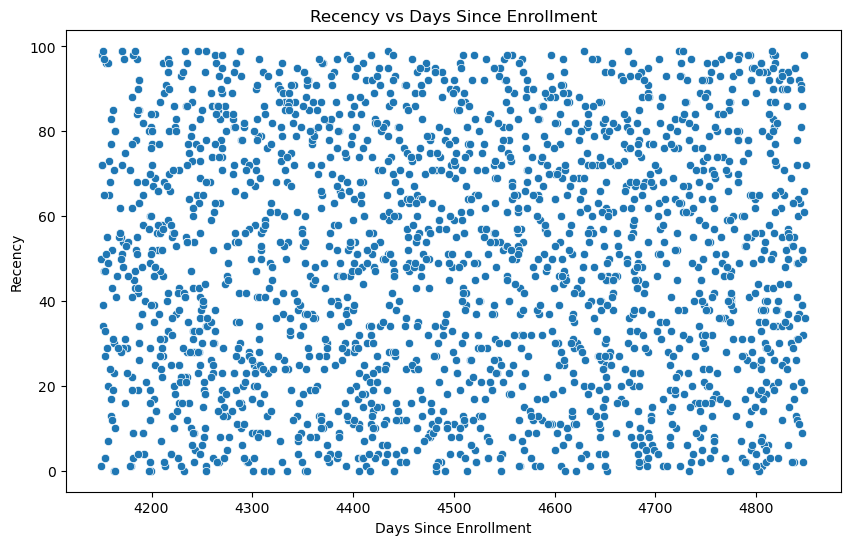

In [71]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='Days_Since', y='Recency', data=df)
plt.title('Recency vs Days Since Enrollment')
plt.xlabel('Days Since Enrollment')
plt.ylabel('Recency')
plt.show()

In [72]:
df['TenureBucket'] = pd.cut(df['Days_Since'], bins=[4000,4300,4600,4900], labels=['11-12yr','12-12.5yr','12.5-13yr'])
df['RecencyBucket'] = pd.cut(
    df['Recency'],
    bins=[-1, 1, 30, 90, 100],
    labels=['0', '1-30', '31-90', '91-100'],
    include_lowest=True
)

pd.crosstab(df['TenureBucket'], df['RecencyBucket'], normalize = 'columns')*100


RecencyBucket,0,1-30,31-90,91-100
TenureBucket,,,,
11-12yr,23.076923,22.801788,20.197418,20.304569
12-12.5yr,42.307692,41.430700,43.432043,41.116751
12.5-13yr,34.615385,35.767511,36.370539,38.578680


In [73]:
df.drop('RecencySegment', axis=1, inplace=True)

In [74]:
df['RecencyBucket'].isnull().sum()

0

In [75]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,Response,Age,Education_nums,Marital_Status_nums,TotalChildren,HasChildren,Days_Since,RecencyRatio,TenureBucket,RecencyBucket
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,1,68,0,3,0,0,4813,0.012051,12.5-13yr,31-90
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,0,71,0,3,2,1,4263,0.008914,11-12yr,31-90
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,0,60,0,1,0,0,4462,0.005827,12-12.5yr,1-30
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,0,41,0,1,1,1,4289,0.006062,11-12yr,1-30
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,0,44,1,0,1,1,4311,0.021805,12-12.5yr,91-100


In [76]:
df['MntWines']  # Amount spent on wine in the last 2 years.

0       635
1        11
2       426
3        11
4       173
       ... 
2235    709
2236    406
2237    908
2238    428
2239     84
Name: MntWines, Length: 2237, dtype: int64

In [77]:
df['MntWines'].describe()

count    2237.000000
mean      303.995530
std       336.574382
min         0.000000
25%        24.000000
50%       174.000000
75%       504.000000
max      1493.000000
Name: MntWines, dtype: float64

In [78]:
df['MntWines'].isnull().sum()

0

<Axes: >

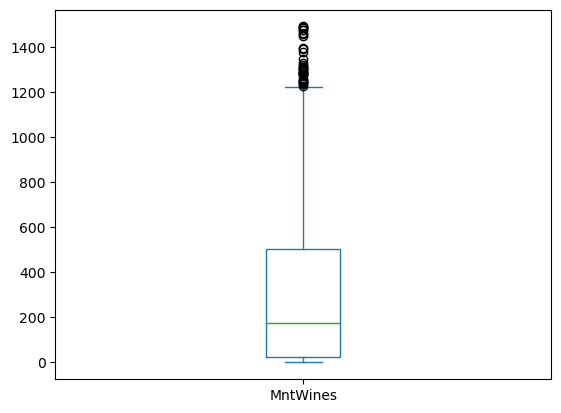

In [79]:
df['MntWines'].plot(kind = 'box')

In [80]:
df['MntWines'].skew()

1.1765673760841293

In [81]:
df.groupby('HasChildren')['MntWines'].describe()

,count,mean,std,min,25%,50%,75%,max
HasChildren,,,,,,,,
0,637.0,486.8854,369.766701,0.0,168.0,450.0,760.00,1493.0
1,1600.0,231.1825,292.228950,0.0,18.0,92.5,368.25,1492.0


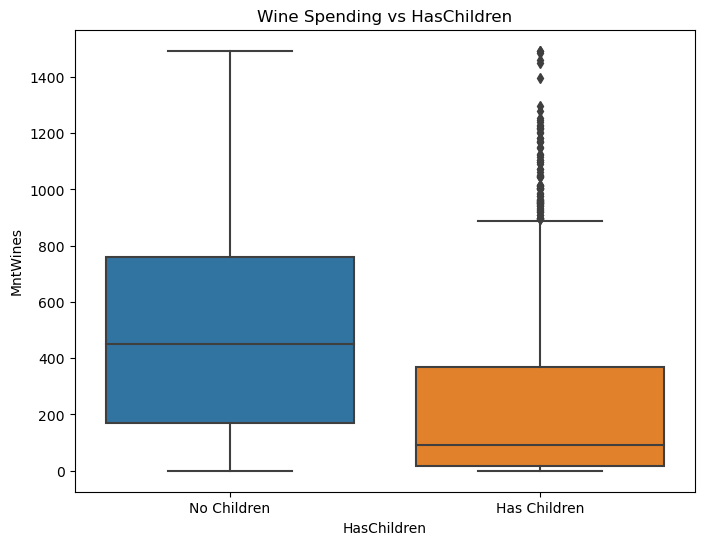

In [82]:
plt.figure(figsize=(8,6))
sns.boxplot(x='HasChildren', y='MntWines', data=df)
plt.xticks([0,1], ['No Children','Has Children'])
plt.title('Wine Spending vs HasChildren')
plt.ylabel('MntWines')
plt.show()

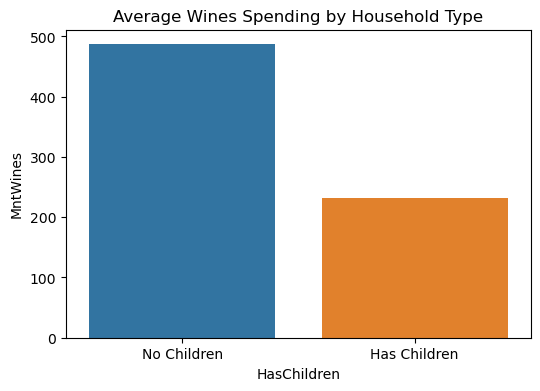

In [83]:
plt.figure(figsize=(6,4))
sns.barplot(x='HasChildren', y='MntWines', data=df, errorbar=None)
plt.xticks([0,1], ['No Children','Has Children'])
plt.title('Average Wines Spending by Household Type')
plt.show()

In [84]:
def find_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR

    outliers = df[(df[column] < lower_limit) | (df[column] > upper_limit)]
    return outliers, lower_limit, upper_limit

# Example for 'Income'
outliers, lower, upper = find_outliers_iqr(df, 'MntWines')
print(f"Outliers in Income: {len(outliers)}")
print(f"Lower Limit: {lower:.2f}, Upper Limit: {upper:.2f}")


Outliers in Income: 35
Lower Limit: -696.00, Upper Limit: 1224.00


In [85]:
df['MntFruits'] # Amount spent on fruits in the last 2 years.

0       88
1        1
2       49
3        4
4       43
        ..
2235    43
2236     0
2237    48
2238    30
2239     3
Name: MntFruits, Length: 2237, dtype: int64

In [86]:
df['MntFruits'].describe()

count    2237.000000
mean       26.270451
std        39.715972
min         0.000000
25%         1.000000
50%         8.000000
75%        33.000000
max       199.000000
Name: MntFruits, dtype: float64

In [87]:
df['MntFruits'].isnull().sum()

0

In [88]:
df.groupby('HasChildren')['MntFruits'].describe()

,count,mean,std,min,25%,50%,75%,max
HasChildren,,,,,,,,
0,637.0,52.213501,50.365971,0.0,14.0,33.0,81.0,197.0
1,1600.0,15.941875,28.668575,0.0,1.0,4.0,16.0,199.0


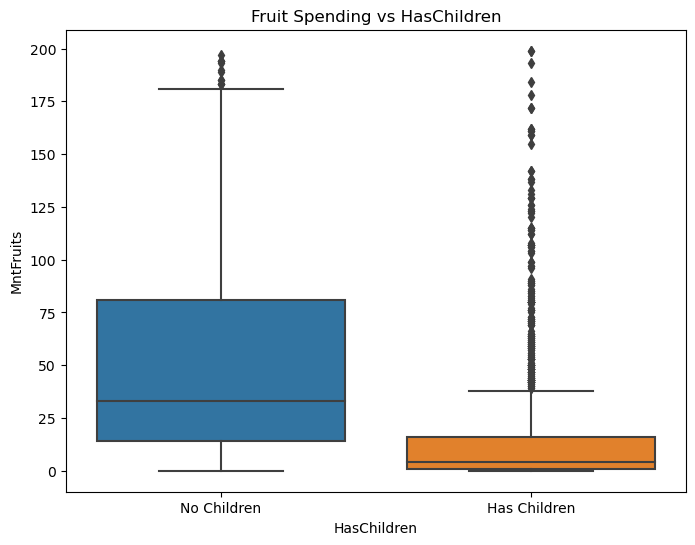

In [89]:
plt.figure(figsize=(8,6))
sns.boxplot(x='HasChildren', y='MntFruits', data=df)
plt.xticks([0,1], ['No Children','Has Children'])
plt.title('Fruit Spending vs HasChildren')
plt.ylabel('MntFruits')
plt.show()

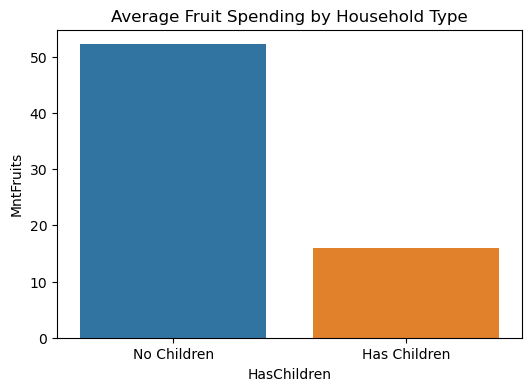

In [90]:
plt.figure(figsize=(6,4))
sns.barplot(x='HasChildren', y='MntFruits', data=df, errorbar=None)
plt.xticks([0,1], ['No Children','Has Children'])
plt.title('Average Fruit Spending by Household Type')
plt.show()

In [91]:
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,Response,Age,Education_nums,Marital_Status_nums,TotalChildren,HasChildren,Days_Since,RecencyRatio,TenureBucket,RecencyBucket
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,1,68,0,3,0,0,4813,0.012051,12.5-13yr,31-90
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,0,71,0,3,2,1,4263,0.008914,11-12yr,31-90
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,0,60,0,1,0,0,4462,0.005827,12-12.5yr,1-30
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,0,41,0,1,1,1,4289,0.006062,11-12yr,1-30
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,0,44,1,0,1,1,4311,0.021805,12-12.5yr,91-100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,...,0,58,0,0,1,1,4531,0.010152,12-12.5yr,31-90
2236,4001,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406,...,0,79,1,1,3,1,4169,0.013432,11-12yr,31-90
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,...,0,44,0,4,0,0,4305,0.021138,12-12.5yr,91-100
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,...,0,69,2,1,1,1,4306,0.001858,12-12.5yr,1-30


In [92]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 2237 entries, 0 to 2239
Data columns (total 38 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2237 non-null   int64         
 1   Year_Birth           2237 non-null   int64         
 2   Education            2237 non-null   object        
 3   Marital_Status       2237 non-null   object        
 4   Income               2237 non-null   float64       
 5   Kidhome              2237 non-null   int64         
 6   Teenhome             2237 non-null   int64         
 7   Dt_Customer          2237 non-null   datetime64[ns]
 8   Recency              2237 non-null   int64         
 9   MntWines             2237 non-null   int64         
 10  MntFruits            2237 non-null   int64         
 11  MntMeatProducts      2237 non-null   int64         
 12  MntFishProducts      2237 non-null   int64         
 13  MntSweetProducts     2237 non-null   i

In [93]:
df = df.loc[:, df.nunique() > 1]


In [94]:
df.drop(['Year_Birth','Education','Marital_Status','Kidhome','Teenhome','Dt_Customer'], axis=1).head()

,ID,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,...,Response,Age,Education_nums,Marital_Status_nums,TotalChildren,HasChildren,Days_Since,RecencyRatio,TenureBucket,RecencyBucket
0,5524,58138.0,58,635,88,546,172,88,88,3,...,1,68,0,3,0,0,4813,0.012051,12.5-13yr,31-90
1,2174,46344.0,38,11,1,6,2,1,6,2,...,0,71,0,3,2,1,4263,0.008914,11-12yr,31-90
2,4141,71613.0,26,426,49,127,111,21,42,1,...,0,60,0,1,0,0,4462,0.005827,12-12.5yr,1-30
3,6182,26646.0,26,11,4,20,10,3,5,2,...,0,41,0,1,1,1,4289,0.006062,11-12yr,1-30
4,5324,58293.0,94,173,43,118,46,27,15,5,...,0,44,1,0,1,1,4311,0.021805,12-12.5yr,91-100


In [95]:
df['MntMeatProducts']

0       546
1         6
2       127
3        20
4       118
       ... 
2235    182
2236     30
2237    217
2238    214
2239     61
Name: MntMeatProducts, Length: 2237, dtype: int64

In [96]:
df['MntMeatProducts'].isnull().sum()

0

In [97]:
df['MntMeatProducts'].describe()

count    2237.000000
mean      166.916853
std       225.661158
min         0.000000
25%        16.000000
50%        67.000000
75%       232.000000
max      1725.000000
Name: MntMeatProducts, dtype: float64

In [98]:
df['MntMeatProducts'].skew() # positvely skewed or righly skewed

2.085895844076842

<Axes: >

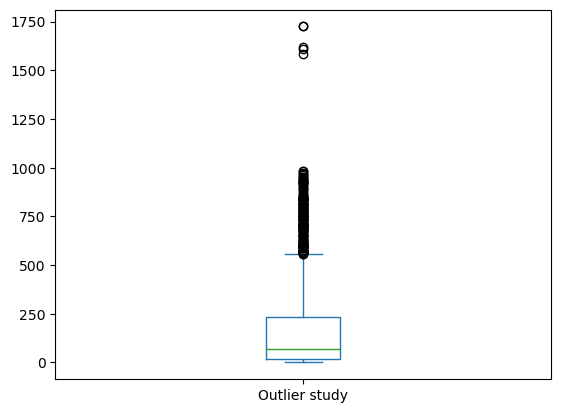

In [99]:
df['MntMeatProducts'].plot(kind = 'box', label ='Outlier study')

<Axes: ylabel='Frequency'>

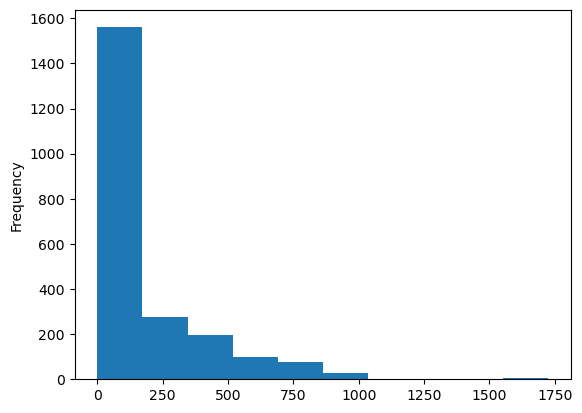

In [100]:
df['MntMeatProducts'].plot(kind = 'hist') #Rightly Skewed 

In [101]:
Q1 = df['MntMeatProducts'].quantile(0.25)
Q3 = df['MntMeatProducts'].quantile(0.75)
IQR = Q3 - Q1

outliers_iqr = ((df['MntMeatProducts'] < (Q1 - 1.5 * IQR)) | (df['MntMeatProducts'] > (Q3 + 1.5 * IQR)))
print("Number of outliers per column:")
print(outliers_iqr.sum())

Number of outliers per column:
174


In [102]:
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [103]:
df.loc[:, 'MntMeatProducts'] = np.where(
    df['MntMeatProducts'] > upper_bound, upper_bound,
    np.where(df['MntMeatProducts'] < lower_bound, lower_bound, df['MntMeatProducts'])
)


In [104]:
Q1 = df['MntMeatProducts'].quantile(0.25)
Q3 = df['MntMeatProducts'].quantile(0.75)
IQR = Q3 - Q1

outliers_iqr = ((df['MntMeatProducts'] < (Q1 - 1.5 * IQR)) | (df['MntMeatProducts'] > (Q3 + 1.5 * IQR)))
print("Number of outliers per column:")
print(outliers_iqr.sum())

Number of outliers per column:
0


<Axes: ylabel='Frequency'>

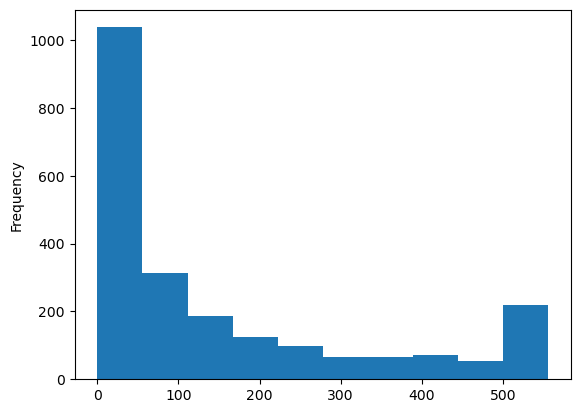

In [105]:
df['MntMeatProducts'].plot(kind = 'hist') #Rightly Skewed 

In [106]:
df['MntMeatProducts'].skew()

1.214151410133074

In [107]:

def count_iqr_outliers(df, column, factor=1.5, verbose=True):
    """
    Counts outliers in a single column using the IQR method.
    
    Parameters:
    -----------
    df : pandas.DataFrame
        Input DataFrame
    column : str
        Column name to check for outliers
    factor : float
        IQR multiplier (default 1.5)
    verbose : bool
        Whether to print the number of outliers
    
    Returns:
    --------
    n_outliers : int
        Number of outliers detected
    outlier_mask : pd.Series
        Boolean mask of outliers in the column
    """
    
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    
    lower = Q1 - factor * IQR
    upper = Q3 + factor * IQR
    
    outlier_mask = (df[column] < lower) | (df[column] > upper)
    n_outliers = outlier_mask.sum()
    
    if verbose:
        print(f"{column} → Number of outliers: {n_outliers}")
    
    return n_outliers, outlier_mask


In [108]:
count_iqr_outliers(df,'MntFruits')

MntFruits → Number of outliers: 226


(226,
 0        True
 1       False
 2       False
 3       False
 4       False
         ...  
 2235    False
 2236    False
 2237    False
 2238    False
 2239    False
 Name: MntFruits, Length: 2237, dtype: bool)

In [109]:
def cap_outliers(df, column):
    """
    Cap outliers in a single column using IQR method.
    """
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    
    # Use .loc to avoid SettingWithCopyWarning
    df.loc[:, column] = np.clip(df[column], lower, upper)
    
    print(f"{column} → Outliers capped: min={df[column].min()}, max={df[column].max()}")
    return df


In [110]:
cap_outliers(df,'MntFruits')

MntFruits → Outliers capped: min=0, max=81


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,Response,Age,Education_nums,Marital_Status_nums,TotalChildren,HasChildren,Days_Since,RecencyRatio,TenureBucket,RecencyBucket
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,1,68,0,3,0,0,4813,0.012051,12.5-13yr,31-90
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,0,71,0,3,2,1,4263,0.008914,11-12yr,31-90
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,0,60,0,1,0,0,4462,0.005827,12-12.5yr,1-30
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,0,41,0,1,1,1,4289,0.006062,11-12yr,1-30
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,0,44,1,0,1,1,4311,0.021805,12-12.5yr,91-100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,...,0,58,0,0,1,1,4531,0.010152,12-12.5yr,31-90
2236,4001,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406,...,0,79,1,1,3,1,4169,0.013432,11-12yr,31-90
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,...,0,44,0,4,0,0,4305,0.021138,12-12.5yr,91-100
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,...,0,69,2,1,1,1,4306,0.001858,12-12.5yr,1-30


In [111]:
Q1 = df['MntFruits'].quantile(0.25)
Q3 = df['MntFruits'].quantile(0.75)
IQR = Q3 - Q1

outliers_iqr = ((df['MntFruits'] < (Q1 - 1.5 * IQR)) | (df['MntFruits'] > (Q3 + 1.5 * IQR)))
print("Number of outliers per column:")
print(outliers_iqr.sum())

Number of outliers per column:
0


In [112]:
count_iqr_outliers(df,'MntWines')

MntWines → Number of outliers: 35


(35,
 0       False
 1       False
 2       False
 3       False
 4       False
         ...  
 2235    False
 2236    False
 2237    False
 2238    False
 2239    False
 Name: MntWines, Length: 2237, dtype: bool)

In [113]:
cap_outliers(df, 'MntWines')

MntWines → Outliers capped: min=0, max=1224


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,Response,Age,Education_nums,Marital_Status_nums,TotalChildren,HasChildren,Days_Since,RecencyRatio,TenureBucket,RecencyBucket
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,1,68,0,3,0,0,4813,0.012051,12.5-13yr,31-90
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,0,71,0,3,2,1,4263,0.008914,11-12yr,31-90
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,0,60,0,1,0,0,4462,0.005827,12-12.5yr,1-30
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,0,41,0,1,1,1,4289,0.006062,11-12yr,1-30
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,0,44,1,0,1,1,4311,0.021805,12-12.5yr,91-100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,...,0,58,0,0,1,1,4531,0.010152,12-12.5yr,31-90
2236,4001,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406,...,0,79,1,1,3,1,4169,0.013432,11-12yr,31-90
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,...,0,44,0,4,0,0,4305,0.021138,12-12.5yr,91-100
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,...,0,69,2,1,1,1,4306,0.001858,12-12.5yr,1-30


In [114]:
Q1 = df['MntWines'].quantile(0.25)
Q3 = df['MntWines'].quantile(0.75)
IQR = Q3 - Q1

outliers_iqr = ((df['MntWines'] < (Q1 - 1.5 * IQR)) | (df['MntWines'] > (Q3 + 1.5 * IQR)))
print("Number of outliers per column:")
print(outliers_iqr.sum())

Number of outliers per column:
0


In [115]:
df.drop(['Year_Birth','Education','Marital_Status','Kidhome','Teenhome','Dt_Customer'], axis=1).head()

,ID,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,...,Response,Age,Education_nums,Marital_Status_nums,TotalChildren,HasChildren,Days_Since,RecencyRatio,TenureBucket,RecencyBucket
0,5524,58138.0,58,635,81,546,172,88,88,3,...,1,68,0,3,0,0,4813,0.012051,12.5-13yr,31-90
1,2174,46344.0,38,11,1,6,2,1,6,2,...,0,71,0,3,2,1,4263,0.008914,11-12yr,31-90
2,4141,71613.0,26,426,49,127,111,21,42,1,...,0,60,0,1,0,0,4462,0.005827,12-12.5yr,1-30
3,6182,26646.0,26,11,4,20,10,3,5,2,...,0,41,0,1,1,1,4289,0.006062,11-12yr,1-30
4,5324,58293.0,94,173,43,118,46,27,15,5,...,0,44,1,0,1,1,4311,0.021805,12-12.5yr,91-100


In [116]:
df['MntFishProducts']

0       172
1         2
2       111
3        10
4        46
       ... 
2235     42
2236      0
2237     32
2238     80
2239      2
Name: MntFishProducts, Length: 2237, dtype: int64

In [117]:
df['MntFishProducts'].isnull().sum()

0

In [118]:
count_iqr_outliers(df,'MntFishProducts')

MntFishProducts → Number of outliers: 223


(223,
 0        True
 1       False
 2       False
 3       False
 4       False
         ...  
 2235    False
 2236    False
 2237    False
 2238    False
 2239    False
 Name: MntFishProducts, Length: 2237, dtype: bool)

In [119]:
cap_outliers(df, 'MntFishProducts')

MntFishProducts → Outliers capped: min=0.0, max=120.5


C:\Users\JOSHUAVIJAYA\AppData\Local\Temp\ipykernel_8140\2971241565.py:12: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[120.5   2.  111.  ...  32.   80.    2. ]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[:, column] = np.clip(df[column], lower, upper)


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,Response,Age,Education_nums,Marital_Status_nums,TotalChildren,HasChildren,Days_Since,RecencyRatio,TenureBucket,RecencyBucket
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,1,68,0,3,0,0,4813,0.012051,12.5-13yr,31-90
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,0,71,0,3,2,1,4263,0.008914,11-12yr,31-90
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,0,60,0,1,0,0,4462,0.005827,12-12.5yr,1-30
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,0,41,0,1,1,1,4289,0.006062,11-12yr,1-30
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,0,44,1,0,1,1,4311,0.021805,12-12.5yr,91-100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,...,0,58,0,0,1,1,4531,0.010152,12-12.5yr,31-90
2236,4001,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406,...,0,79,1,1,3,1,4169,0.013432,11-12yr,31-90
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,...,0,44,0,4,0,0,4305,0.021138,12-12.5yr,91-100
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,...,0,69,2,1,1,1,4306,0.001858,12-12.5yr,1-30


In [120]:
Q1 = df['MntFishProducts'].quantile(0.25)
Q3 = df['MntFishProducts'].quantile(0.75)
IQR = Q3 - Q1

outliers_iqr = ((df['MntFishProducts'] < (Q1 - 1.5 * IQR)) | (df['MntFishProducts'] > (Q3 + 1.5 * IQR)))
print("Number of outliers per column:")
print(outliers_iqr.sum())

Number of outliers per column:
0


In [121]:

def remove_outliers(df, column, factor=1.5):
    """
    Remove rows where the column has outliers based on IQR.
    
    Parameters:
    -----------
    df : pandas.DataFrame
    column : str
        Column to check for outliers
    factor : float
        Multiplier for IQR (1.5 = strict, 3.0 = loose)
        
    Returns:
    --------
    df_clean : pandas.DataFrame
        DataFrame with outliers removed
    """
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    
    lower = Q1 - factor * IQR
    upper = Q3 + factor * IQR
    
    df_clean = df[(df[column] >= lower) & (df[column] <= upper)]
    print(f"{column} → Removed {len(df) - len(df_clean)} outliers")
    return df_clean


<Axes: ylabel='Frequency'>

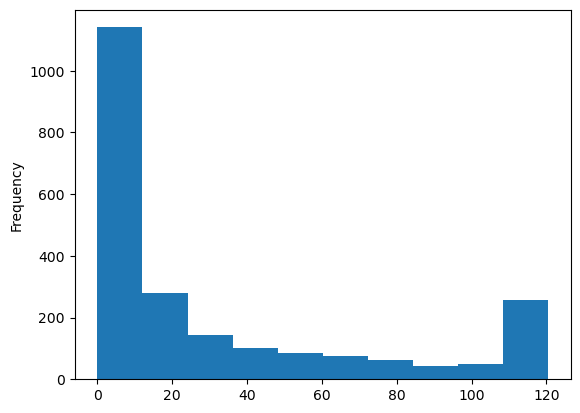

In [122]:
df['MntFishProducts'].plot(kind= 'hist')

<Axes: >

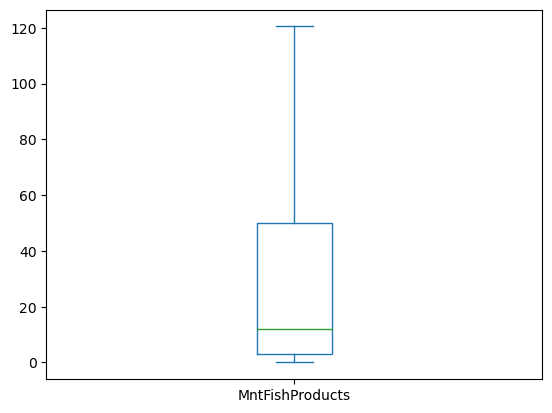

In [123]:
df['MntFishProducts'].plot(kind = 'box')

In [124]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2237 entries, 0 to 2239
Data columns (total 36 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2237 non-null   int64         
 1   Year_Birth           2237 non-null   int64         
 2   Education            2237 non-null   object        
 3   Marital_Status       2237 non-null   object        
 4   Income               2237 non-null   float64       
 5   Kidhome              2237 non-null   int64         
 6   Teenhome             2237 non-null   int64         
 7   Dt_Customer          2237 non-null   datetime64[ns]
 8   Recency              2237 non-null   int64         
 9   MntWines             2237 non-null   int64         
 10  MntFruits            2237 non-null   int64         
 11  MntMeatProducts      2237 non-null   int64         
 12  MntFishProducts      2237 non-null   float64       
 13  MntSweetProducts     2237 non-null   i

In [125]:
df['MntSweetProducts']

0        88
1         1
2        21
3         3
4        27
       ... 
2235    118
2236      0
2237     12
2238     30
2239      1
Name: MntSweetProducts, Length: 2237, dtype: int64

In [126]:
df['MntSweetProducts'].isnull().sum()

0

<Axes: >

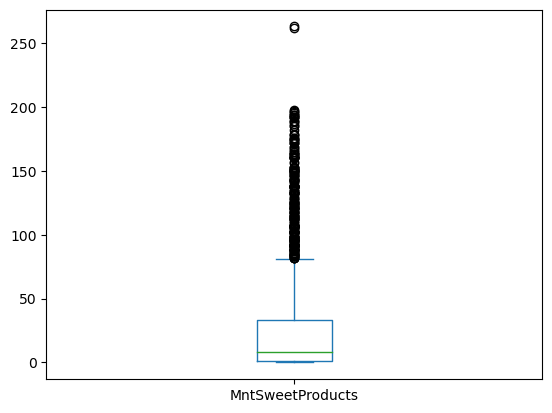

In [127]:
df['MntSweetProducts'].plot(kind = 'box')

In [128]:
count_iqr_outliers(df,'MntSweetProducts')

MntSweetProducts → Number of outliers: 248


(248,
 0        True
 1       False
 2       False
 3       False
 4       False
         ...  
 2235     True
 2236    False
 2237    False
 2238    False
 2239    False
 Name: MntSweetProducts, Length: 2237, dtype: bool)

In [129]:
cap_outliers(df,'MntSweetProducts')

MntSweetProducts → Outliers capped: min=0, max=81


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,Response,Age,Education_nums,Marital_Status_nums,TotalChildren,HasChildren,Days_Since,RecencyRatio,TenureBucket,RecencyBucket
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,1,68,0,3,0,0,4813,0.012051,12.5-13yr,31-90
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,0,71,0,3,2,1,4263,0.008914,11-12yr,31-90
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,0,60,0,1,0,0,4462,0.005827,12-12.5yr,1-30
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,0,41,0,1,1,1,4289,0.006062,11-12yr,1-30
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,0,44,1,0,1,1,4311,0.021805,12-12.5yr,91-100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,...,0,58,0,0,1,1,4531,0.010152,12-12.5yr,31-90
2236,4001,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406,...,0,79,1,1,3,1,4169,0.013432,11-12yr,31-90
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,...,0,44,0,4,0,0,4305,0.021138,12-12.5yr,91-100
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,...,0,69,2,1,1,1,4306,0.001858,12-12.5yr,1-30


In [130]:
Q1 = df['MntSweetProducts'].quantile(0.25)
Q3 = df['MntSweetProducts'].quantile(0.75)
IQR = Q3 - Q1

outliers_iqr = ((df['MntSweetProducts'] < (Q1 - 1.5 * IQR)) | (df['MntSweetProducts'] > (Q3 + 1.5 * IQR)))
print("Number of outliers per column:")
print(outliers_iqr.sum())

Number of outliers per column:
0


In [131]:
df['MntGoldProds']

0        88
1         6
2        42
3         5
4        15
       ... 
2235    247
2236      8
2237     24
2238     61
2239     21
Name: MntGoldProds, Length: 2237, dtype: int64

In [132]:
df['MntGoldProds'].isnull().sum()

0

In [133]:
count_iqr_outliers(df, 'MntGoldProds')

MntGoldProds → Number of outliers: 206


(206,
 0       False
 1       False
 2       False
 3       False
 4       False
         ...  
 2235     True
 2236    False
 2237    False
 2238    False
 2239    False
 Name: MntGoldProds, Length: 2237, dtype: bool)

In [134]:
cap_outliers(df, 'MntGoldProds')

MntGoldProds → Outliers capped: min=0.0, max=126.5


C:\Users\JOSHUAVIJAYA\AppData\Local\Temp\ipykernel_8140\2971241565.py:12: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[88.  6. 42. ... 24. 61. 21.]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[:, column] = np.clip(df[column], lower, upper)


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,Response,Age,Education_nums,Marital_Status_nums,TotalChildren,HasChildren,Days_Since,RecencyRatio,TenureBucket,RecencyBucket
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,1,68,0,3,0,0,4813,0.012051,12.5-13yr,31-90
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,0,71,0,3,2,1,4263,0.008914,11-12yr,31-90
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,0,60,0,1,0,0,4462,0.005827,12-12.5yr,1-30
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,0,41,0,1,1,1,4289,0.006062,11-12yr,1-30
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,0,44,1,0,1,1,4311,0.021805,12-12.5yr,91-100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,...,0,58,0,0,1,1,4531,0.010152,12-12.5yr,31-90
2236,4001,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406,...,0,79,1,1,3,1,4169,0.013432,11-12yr,31-90
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,...,0,44,0,4,0,0,4305,0.021138,12-12.5yr,91-100
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,...,0,69,2,1,1,1,4306,0.001858,12-12.5yr,1-30


<Axes: >

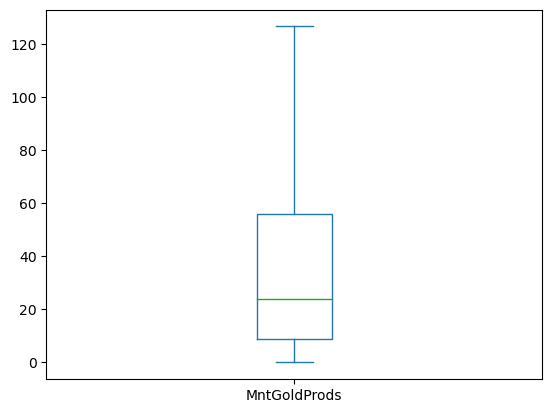

In [135]:
df['MntGoldProds'].plot(kind ='box') #after treatment of outliers

In [136]:
df.groupby('HasChildren')['MntSweetProducts'].describe()

,count,mean,std,min,25%,50%,75%,max
HasChildren,,,,,,,,
0,637.0,40.901099,30.302063,0.0,13.0,35.0,81.0,81.0
1,1600.0,14.386875,22.246579,0.0,1.0,5.0,15.0,81.0


C:\Users\JOSHUAVIJAYA\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\JOSHUAVIJAYA\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


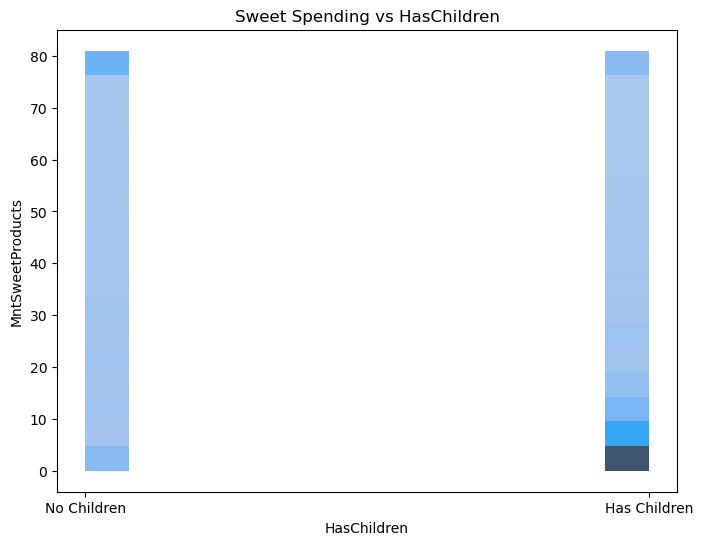

In [137]:
plt.figure(figsize=(8,6))
sns.histplot(x='HasChildren', y='MntSweetProducts', data=df)
plt.xticks([0,1], ['No Children','Has Children'])
plt.title('Sweet Spending vs HasChildren')
plt.ylabel('MntSweetProducts')
plt.show()

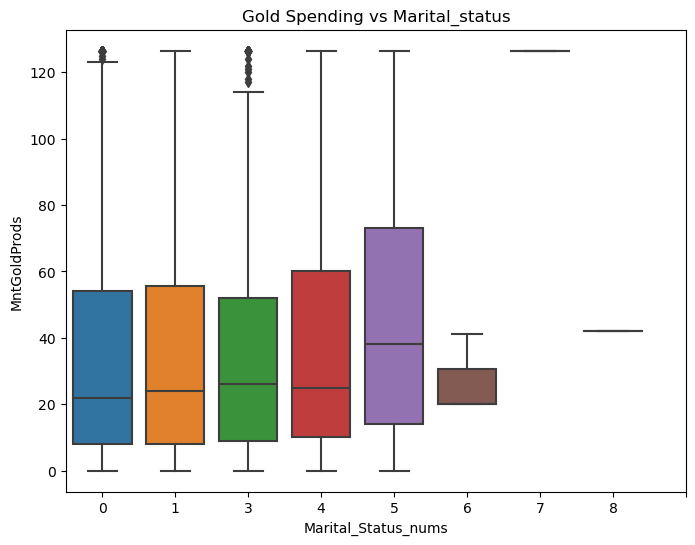

In [138]:
plt.figure(figsize=(8,6))
sns.boxplot(x='Marital_Status_nums', y='MntGoldProds', data=df)
plt.xticks([0,1,2,3,4,5,6,7,8])
plt.title('Gold Spending vs Marital_status')
plt.ylabel('MntGoldProds')
plt.show()

In [139]:
df['Marital_Status_nums'].value_counts()

Marital_Status_nums
0    864
1    579
3    479
4    231
5     77
6      3
7      2
8      2
Name: count, dtype: int64

In [140]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2237 entries, 0 to 2239
Data columns (total 36 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2237 non-null   int64         
 1   Year_Birth           2237 non-null   int64         
 2   Education            2237 non-null   object        
 3   Marital_Status       2237 non-null   object        
 4   Income               2237 non-null   float64       
 5   Kidhome              2237 non-null   int64         
 6   Teenhome             2237 non-null   int64         
 7   Dt_Customer          2237 non-null   datetime64[ns]
 8   Recency              2237 non-null   int64         
 9   MntWines             2237 non-null   int64         
 10  MntFruits            2237 non-null   int64         
 11  MntMeatProducts      2237 non-null   int64         
 12  MntFishProducts      2237 non-null   float64       
 13  MntSweetProducts     2237 non-null   i

In [141]:
df['NumDealsPurchases'] #Number of purchases made with a discount or deal.

0       3
1       2
2       1
3       2
4       5
       ..
2235    2
2236    7
2237    1
2238    2
2239    3
Name: NumDealsPurchases, Length: 2237, dtype: int64

In [142]:
df['NumDealsPurchases'].value_counts()

NumDealsPurchases
1     967
2     497
3     297
4     189
5      94
6      61
0      46
7      40
8      14
9       8
15      7
10      5
11      5
12      4
13      3
Name: count, dtype: int64

<Axes: >

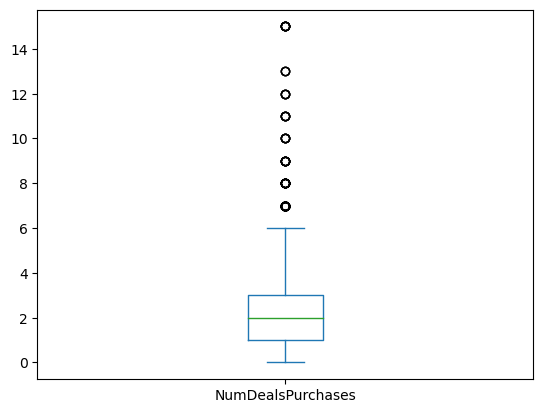

In [143]:
df['NumDealsPurchases'].plot(kind= 'box')

In [144]:
count_iqr_outliers(df,'NumDealsPurchases')

NumDealsPurchases → Number of outliers: 86


(86,
 0       False
 1       False
 2       False
 3       False
 4       False
         ...  
 2235    False
 2236     True
 2237    False
 2238    False
 2239    False
 Name: NumDealsPurchases, Length: 2237, dtype: bool)

In [145]:
cap_outliers(df,'NumDealsPurchases')

NumDealsPurchases → Outliers capped: min=0, max=6


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,Response,Age,Education_nums,Marital_Status_nums,TotalChildren,HasChildren,Days_Since,RecencyRatio,TenureBucket,RecencyBucket
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,1,68,0,3,0,0,4813,0.012051,12.5-13yr,31-90
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,0,71,0,3,2,1,4263,0.008914,11-12yr,31-90
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,0,60,0,1,0,0,4462,0.005827,12-12.5yr,1-30
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,0,41,0,1,1,1,4289,0.006062,11-12yr,1-30
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,0,44,1,0,1,1,4311,0.021805,12-12.5yr,91-100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,...,0,58,0,0,1,1,4531,0.010152,12-12.5yr,31-90
2236,4001,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406,...,0,79,1,1,3,1,4169,0.013432,11-12yr,31-90
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,...,0,44,0,4,0,0,4305,0.021138,12-12.5yr,91-100
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,...,0,69,2,1,1,1,4306,0.001858,12-12.5yr,1-30


<Axes: >

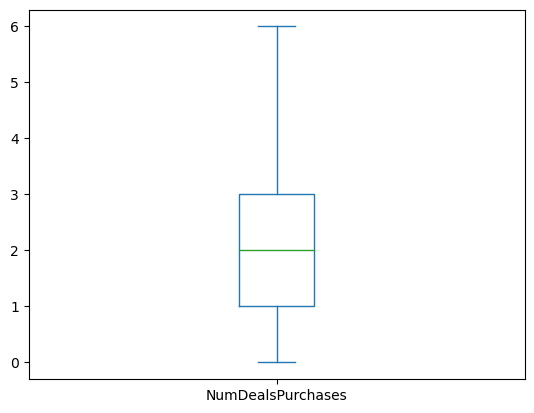

In [146]:
df['NumDealsPurchases'].plot(kind= 'box')

In [147]:
df['NumWebPurchases']# Number of purchases made through the web.

0       8
1       1
2       8
3       2
4       5
       ..
2235    9
2236    8
2237    2
2238    6
2239    3
Name: NumWebPurchases, Length: 2237, dtype: int64

In [148]:
df['NumWebPurchases'].isnull().sum()

0

<Axes: >

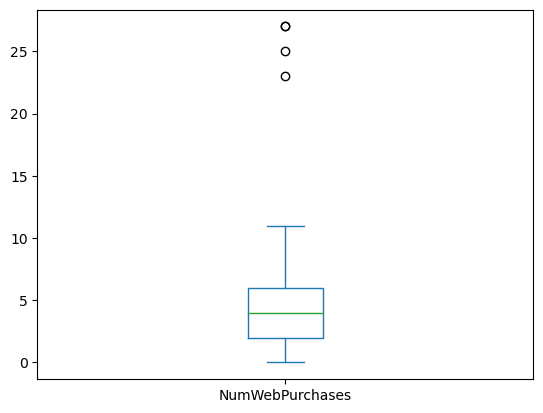

In [149]:
df['NumWebPurchases'].plot(kind = 'box')

<Axes: ylabel='Frequency'>

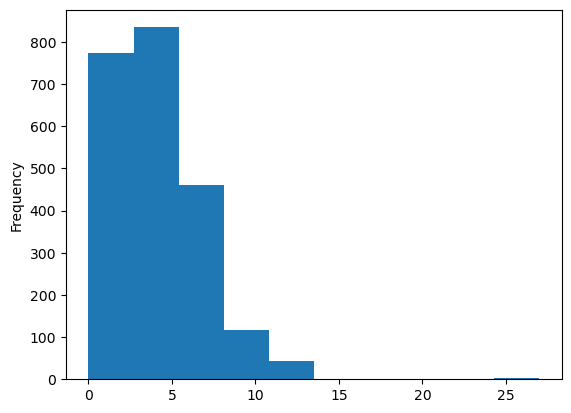

In [150]:
df['NumWebPurchases'].plot(kind ='hist')

In [151]:
df['NumWebPurchases'].skew()

1.3817987269181422

In [152]:
count_iqr_outliers(df,'NumWebPurchases')

NumWebPurchases → Number of outliers: 4


(4,
 0       False
 1       False
 2       False
 3       False
 4       False
         ...  
 2235    False
 2236    False
 2237    False
 2238    False
 2239    False
 Name: NumWebPurchases, Length: 2237, dtype: bool)

In [153]:
cap_outliers(df,'NumWebPurchases')

NumWebPurchases → Outliers capped: min=0, max=12


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,Response,Age,Education_nums,Marital_Status_nums,TotalChildren,HasChildren,Days_Since,RecencyRatio,TenureBucket,RecencyBucket
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,1,68,0,3,0,0,4813,0.012051,12.5-13yr,31-90
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,0,71,0,3,2,1,4263,0.008914,11-12yr,31-90
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,0,60,0,1,0,0,4462,0.005827,12-12.5yr,1-30
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,0,41,0,1,1,1,4289,0.006062,11-12yr,1-30
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,0,44,1,0,1,1,4311,0.021805,12-12.5yr,91-100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,...,0,58,0,0,1,1,4531,0.010152,12-12.5yr,31-90
2236,4001,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406,...,0,79,1,1,3,1,4169,0.013432,11-12yr,31-90
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,...,0,44,0,4,0,0,4305,0.021138,12-12.5yr,91-100
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,...,0,69,2,1,1,1,4306,0.001858,12-12.5yr,1-30


<Axes: >

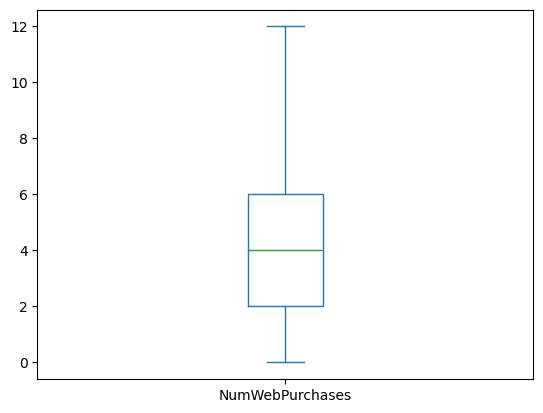

In [154]:
df['NumWebPurchases'].plot(kind ='box')

In [155]:
df['NumCatalogPurchases'] # Number of purchases made through catalogs.

0       10
1        1
2        2
3        0
4        3
        ..
2235     3
2236     2
2237     3
2238     5
2239     1
Name: NumCatalogPurchases, Length: 2237, dtype: int64

In [156]:
df['NumCatalogPurchases'].isnull().sum()

0

<Axes: >

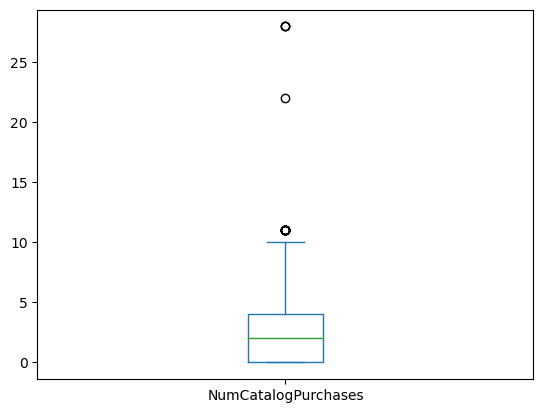

In [157]:
df['NumCatalogPurchases'].plot(kind ='box')

<Axes: ylabel='Frequency'>

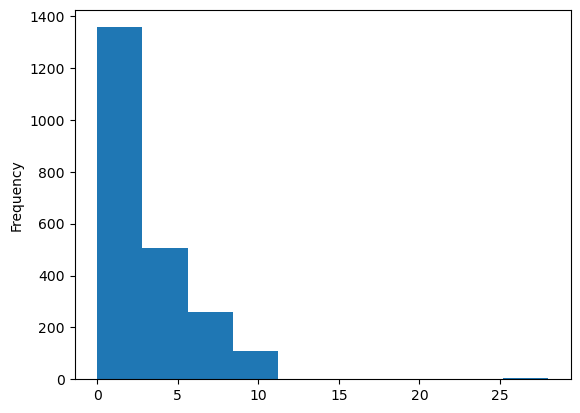

In [158]:
df['NumCatalogPurchases'].plot(kind ='hist')

In [159]:
df['NumCatalogPurchases'].value_counts()

NumCatalogPurchases
0     585
1     496
2     276
3     184
4     182
5     140
6     127
7      79
8      55
10     48
9      42
11     19
28      3
22      1
Name: count, dtype: int64

In [160]:

count_iqr_outliers(df,'NumCatalogPurchases')

NumCatalogPurchases → Number of outliers: 23


(23,
 0       False
 1       False
 2       False
 3       False
 4       False
         ...  
 2235    False
 2236    False
 2237    False
 2238    False
 2239    False
 Name: NumCatalogPurchases, Length: 2237, dtype: bool)

In [161]:
cap_outliers(df,'NumCatalogPurchases')

NumCatalogPurchases → Outliers capped: min=0, max=10


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,Response,Age,Education_nums,Marital_Status_nums,TotalChildren,HasChildren,Days_Since,RecencyRatio,TenureBucket,RecencyBucket
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,1,68,0,3,0,0,4813,0.012051,12.5-13yr,31-90
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,0,71,0,3,2,1,4263,0.008914,11-12yr,31-90
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,0,60,0,1,0,0,4462,0.005827,12-12.5yr,1-30
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,0,41,0,1,1,1,4289,0.006062,11-12yr,1-30
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,0,44,1,0,1,1,4311,0.021805,12-12.5yr,91-100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,...,0,58,0,0,1,1,4531,0.010152,12-12.5yr,31-90
2236,4001,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406,...,0,79,1,1,3,1,4169,0.013432,11-12yr,31-90
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,...,0,44,0,4,0,0,4305,0.021138,12-12.5yr,91-100
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,...,0,69,2,1,1,1,4306,0.001858,12-12.5yr,1-30


<Axes: >

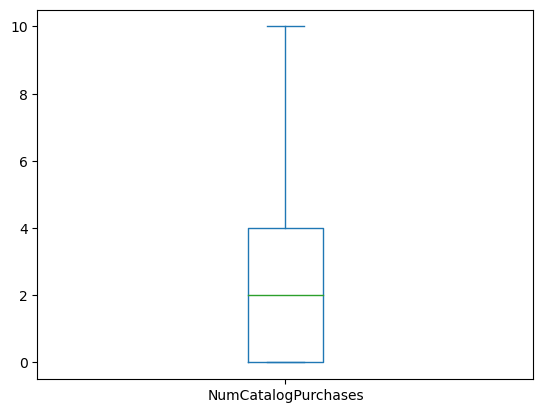

In [162]:
df['NumCatalogPurchases'].plot(kind ='box')

In [163]:
df['NumStorePurchases']	#Number of purchases made in physical stores.


0        4
1        2
2       10
3        4
4        6
        ..
2235     4
2236     5
2237    13
2238    10
2239     4
Name: NumStorePurchases, Length: 2237, dtype: int64

In [164]:
df['NumStorePurchases'].isnull().sum()

0

<Axes: >

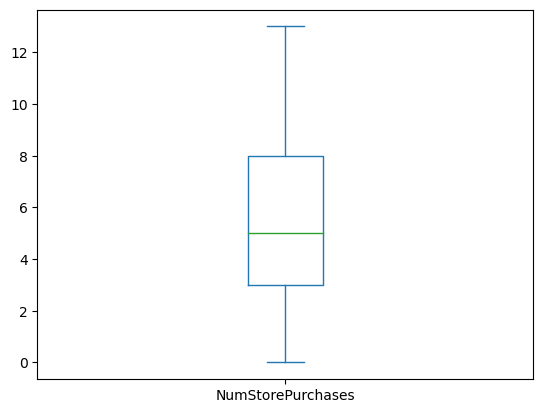

In [165]:
df['NumStorePurchases'].plot(kind = 'box')

In [166]:
df['NumWebVisitsMonth']	#Number of visits to the company website in the last month.

0       7
1       5
2       4
3       6
4       5
       ..
2235    5
2236    7
2237    6
2238    3
2239    7
Name: NumWebVisitsMonth, Length: 2237, dtype: int64

In [167]:
df['NumWebVisitsMonth'].isnull().sum()

0

<Axes: >

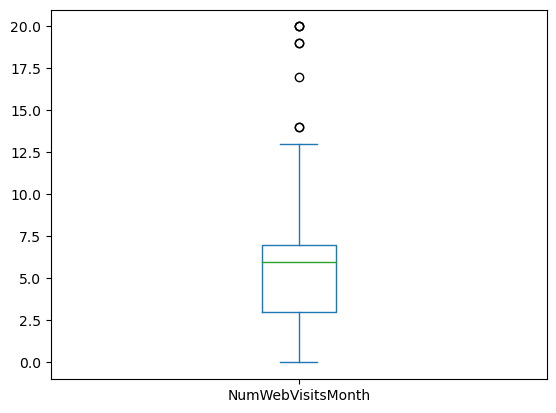

In [168]:
df['NumWebVisitsMonth'].plot(kind = 'box')

In [169]:
count_iqr_outliers(df,'NumWebVisitsMonth')

NumWebVisitsMonth → Number of outliers: 8


(8,
 0       False
 1       False
 2       False
 3       False
 4       False
         ...  
 2235    False
 2236    False
 2237    False
 2238    False
 2239    False
 Name: NumWebVisitsMonth, Length: 2237, dtype: bool)

In [170]:
cap_outliers(df,'NumWebVisitsMonth')

NumWebVisitsMonth → Outliers capped: min=0, max=13


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,Response,Age,Education_nums,Marital_Status_nums,TotalChildren,HasChildren,Days_Since,RecencyRatio,TenureBucket,RecencyBucket
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,1,68,0,3,0,0,4813,0.012051,12.5-13yr,31-90
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,0,71,0,3,2,1,4263,0.008914,11-12yr,31-90
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,0,60,0,1,0,0,4462,0.005827,12-12.5yr,1-30
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,0,41,0,1,1,1,4289,0.006062,11-12yr,1-30
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,0,44,1,0,1,1,4311,0.021805,12-12.5yr,91-100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,...,0,58,0,0,1,1,4531,0.010152,12-12.5yr,31-90
2236,4001,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406,...,0,79,1,1,3,1,4169,0.013432,11-12yr,31-90
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,...,0,44,0,4,0,0,4305,0.021138,12-12.5yr,91-100
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,...,0,69,2,1,1,1,4306,0.001858,12-12.5yr,1-30


<Axes: >

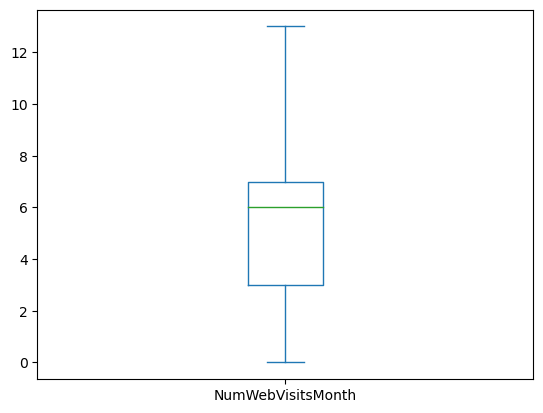

In [171]:
df['NumWebVisitsMonth'].plot(kind = 'box')

In [172]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2237 entries, 0 to 2239
Data columns (total 36 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2237 non-null   int64         
 1   Year_Birth           2237 non-null   int64         
 2   Education            2237 non-null   object        
 3   Marital_Status       2237 non-null   object        
 4   Income               2237 non-null   float64       
 5   Kidhome              2237 non-null   int64         
 6   Teenhome             2237 non-null   int64         
 7   Dt_Customer          2237 non-null   datetime64[ns]
 8   Recency              2237 non-null   int64         
 9   MntWines             2237 non-null   int64         
 10  MntFruits            2237 non-null   int64         
 11  MntMeatProducts      2237 non-null   int64         
 12  MntFishProducts      2237 non-null   float64       
 13  MntSweetProducts     2237 non-null   i

In [173]:
df['AcceptedCmp3']

0       0
1       0
2       0
3       0
4       0
       ..
2235    0
2236    0
2237    0
2238    0
2239    0
Name: AcceptedCmp3, Length: 2237, dtype: int64

In [174]:
df['AcceptedCmp3'].isnull().sum()

0

In [175]:
df['AcceptedCmp3'].value_counts()

AcceptedCmp3
0    2074
1     163
Name: count, dtype: int64

In [176]:
df['AcceptedCmp1']

0       0
1       0
2       0
3       0
4       0
       ..
2235    0
2236    1
2237    0
2238    0
2239    0
Name: AcceptedCmp1, Length: 2237, dtype: int64

In [177]:
df['AcceptedCmp1'].isnull().sum()

0

In [178]:
df['AcceptedCmp1'].value_counts()

AcceptedCmp1
0    2093
1     144
Name: count, dtype: int64

In [179]:
df['AcceptedCmp2']

0       0
1       0
2       0
3       0
4       0
       ..
2235    0
2236    0
2237    0
2238    0
2239    0
Name: AcceptedCmp2, Length: 2237, dtype: int64

In [180]:
df['AcceptedCmp2'].isnull().sum()

0

In [181]:
df['AcceptedCmp2'].value_counts()

AcceptedCmp2
0    2207
1      30
Name: count, dtype: int64

In [182]:
print(df['AcceptedCmp4'])
print(df['AcceptedCmp4'].isnull().sum())
print(df['AcceptedCmp4'].value_counts())


0       0
1       0
2       0
3       0
4       0
       ..
2235    0
2236    0
2237    1
2238    0
2239    0
Name: AcceptedCmp4, Length: 2237, dtype: int64
0
AcceptedCmp4
0    2070
1     167
Name: count, dtype: int64


In [183]:
print(df['AcceptedCmp5'])
print(df['AcceptedCmp5'].isnull().sum())
print(df['AcceptedCmp5'].value_counts())


0       0
1       0
2       0
3       0
4       0
       ..
2235    0
2236    0
2237    0
2238    0
2239    0
Name: AcceptedCmp5, Length: 2237, dtype: int64
0
AcceptedCmp5
0    2075
1     162
Name: count, dtype: int64


In [184]:
# Campaign Effectiveness
df[['AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5']].mean()*100
# Gives you the acceptance rate (proportion of customers who accepted each campaign).

AcceptedCmp1    6.437193
AcceptedCmp2    1.341082
AcceptedCmp3    7.286544
AcceptedCmp4    7.465355
AcceptedCmp5    7.241842
dtype: float64

In [185]:
df = df.copy()  # ensures you have a clean copy, not a view
df['TotalAccepted'] = df[['AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5']].sum(axis=1)

# Count how many campaigns each customer accepted:

In [186]:
df['TotalAccepted'].value_counts()

TotalAccepted
0    1775
1     324
2      83
3      44
4      11
Name: count, dtype: int64

In [187]:
print(df[df['TotalAccepted']>=2]['ID'].count())

138


In [188]:
df.groupby('AcceptedCmp1')['AcceptedCmp5'].mean()
# Campaign Overlap or Fatigue
# Some customers might accept only the early campaigns, others only the recent ones.
# This can show timing effects or message fatigue.

AcceptedCmp1
0    0.044912
1    0.472222
Name: AcceptedCmp5, dtype: float64

In [189]:
df.groupby('HasChildren')[['AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5']].mean()*100
# Customer Segmentation

,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5
HasChildren,,,,,
0,17.268446,2.825746,7.535322,10.832025,21.507064
1,2.125000,0.750000,7.187500,6.125000,1.562500


In [190]:
df['Complain'] #Whether the customer complained in the last 2 years (1 = yes, 0 = no).

0       0
1       0
2       0
3       0
4       0
       ..
2235    0
2236    0
2237    0
2238    0
2239    0
Name: Complain, Length: 2237, dtype: int64

In [191]:
df['Complain'].value_counts()

Complain
0    2217
1      20
Name: count, dtype: int64

In [192]:
df['Complain'].isnull().sum()

0

In [193]:
count_com = df[df['Complain'] == 1]['ID'].count()
count_nocom = df[df['Complain'] == 0]['ID'].count()
print((count_com/count_nocom)*100)

0.9021199819576003


In [194]:
df['Response'] #Whether the customer responded positively to the latest campaign (1 = yes, 0 = no).

0       1
1       0
2       0
3       0
4       0
       ..
2235    0
2236    0
2237    0
2238    0
2239    1
Name: Response, Length: 2237, dtype: int64

In [195]:
df['Response'].isnull().sum()

0

In [196]:
df.groupby('Response')[['AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5']].mean()*100
# Customer Segmentation

,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5
Response,,,,,
0,3.415659,0.525486,4.519180,5.517604,3.678403
1,23.652695,5.988024,23.053892,18.562874,27.544910


In [197]:
num_cols = df.select_dtypes(include=['int64', 'float64']).columns

In [221]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])
df[num_cols].describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,Age,Education_nums,Marital_Status_nums,TotalChildren,HasChildren,Days_Since,RecencyRatio,TotalAccepted,PCA1,PCA2
count,2.237000e+03,2.237000e+03,2.237000e+03,2.237000e+03,2.237000e+03,2.237000e+03,2.237000e+03,2.237000e+03,2237.000000,2.237000e+03,...,2.237000e+03,2.237000e+03,2.237000e+03,2.237000e+03,2.237000e+03,2.237000e+03,2.237000e+03,2.237000e+03,2.237000e+03,2.237000e+03
mean,9.528959e-18,2.064608e-17,1.905792e-17,1.429344e-17,5.399744e-17,-3.930696e-17,-3.890992e-17,-1.588160e-17,0.000000,1.905792e-17,...,1.111712e-17,-2.699872e-17,3.176320e-18,-9.528959e-18,-4.129216e-17,8.734879e-18,2.183720e-17,3.493952e-17,-4.764480e-18,6.352640e-18
std,1.000224e+00,1.000224e+00,1.000224e+00,1.000224e+00,1.000224e+00,1.000224e+00,1.000224e+00,1.000224e+00,1.000224,1.000224e+00,...,1.000224e+00,1.000224e+00,1.000224e+00,1.000224e+00,1.000224e+00,1.000224e+00,1.000224e+00,1.000224e+00,1.000224e+00,1.000224e+00
min,-1.723196e+00,-2.470374e+00,-2.016951e+00,-8.253884e-01,-9.302273e-01,-1.696210e+00,-9.131045e-01,-7.956439e-01,-0.844278,-7.958118e-01,...,-2.316236e+00,-8.210709e-01,-9.397353e-01,-1.264618e+00,-1.584858e+00,-1.750633e+00,-1.691504e+00,-4.388155e-01,-1.681287e+00,-2.693086e+00
25%,-8.512305e-01,-8.463457e-01,-6.673240e-01,-8.253884e-01,-9.302273e-01,-8.671831e-01,-8.405771e-01,-7.589262e-01,-0.754712,-7.214512e-01,...,-6.922077e-01,-8.210709e-01,-9.397353e-01,-1.264618e+00,-1.584858e+00,-8.550051e-01,-8.531852e-01,-4.388155e-01,-8.985687e-01,-8.239563e-01
50%,-4.183415e-02,9.388133e-02,-3.007228e-02,-8.253884e-01,-9.302273e-01,-3.613327e-03,-3.872805e-01,-5.019020e-01,-0.469220,-4.983692e-01,...,-9.388133e-02,-8.210709e-01,-3.164955e-01,6.540104e-02,6.309715e-01,1.093387e-02,1.023533e-02,-4.388155e-01,-2.927355e-01,-6.474009e-03
75%,8.742077e-01,6.922077e-01,6.409671e-01,1.032151e+00,9.064174e-01,8.599565e-01,6.099720e-01,4.160413e-01,0.454429,4.435323e-01,...,8.463457e-01,9.761264e-01,9.299841e-01,6.540104e-02,6.309715e-01,8.669763e-01,8.681097e-01,-4.388155e-01,7.850021e-01,7.754325e-01
max,1.726139e+00,2.316236e+00,2.453931e+01,2.889690e+00,2.743062e+00,1.723526e+00,2.785796e+00,2.178493e+00,2.268140,2.191007e+00,...,2.470374e+00,2.773324e+00,4.046183e+00,2.725440e+00,6.309715e-01,1.708174e+00,2.002582e+00,5.456862e+00,2.978321e+00,3.098434e+00


,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,Complain,Response,Age,Education_nums,Marital_Status_nums,TotalChildren,HasChildren,Days_Since,RecencyRatio,TotalAccepted
count,2.237000e+03,2.237000e+03,2.237000e+03,2.237000e+03,2.237000e+03,2.237000e+03,2.237000e+03,2.237000e+03,2.237000e+03,2.237000e+03,...,2.237000e+03,2.237000e+03,2.237000e+03,2.237000e+03,2.237000e+03,2.237000e+03,2.237000e+03,2.237000e+03,2.237000e+03,2.237000e+03
mean,1.588160e-17,1.153004e-15,8.258431e-17,1.429344e-17,-9.528959e-17,1.195090e-16,-5.399744e-17,-1.588160e-17,8.734879e-17,-7.146720e-17,...,1.429344e-17,3.652768e-17,5.955600e-17,-3.017504e-17,-7.146720e-17,3.176320e-17,-4.129216e-17,-2.217071e-15,7.504055e-17,-2.938096e-17
std,1.000224e+00,1.000224e+00,1.000224e+00,1.000224e+00,1.000224e+00,1.000224e+00,1.000224e+00,1.000224e+00,1.000224e+00,1.000224e+00,...,1.000224e+00,1.000224e+00,1.000224e+00,1.000224e+00,1.000224e+00,1.000224e+00,1.000224e+00,1.000224e+00,1.000224e+00,1.000224e+00
min,-1.723196e+00,-2.470374e+00,-2.016951e+00,-8.253884e-01,-9.302273e-01,-1.696210e+00,-9.131045e-01,-7.956439e-01,-8.442781e-01,-7.958118e-01,...,-9.498000e-02,-4.189419e-01,-2.316236e+00,-8.210709e-01,-9.397353e-01,-1.264618e+00,-1.584858e+00,-1.750633e+00,-1.691504e+00,-4.388155e-01
25%,-8.512305e-01,-8.463457e-01,-6.673240e-01,-8.253884e-01,-9.302273e-01,-8.671831e-01,-8.405771e-01,-7.589262e-01,-7.547121e-01,-7.214512e-01,...,-9.498000e-02,-4.189419e-01,-6.922077e-01,-8.210709e-01,-9.397353e-01,-1.264618e+00,-1.584858e+00,-8.550051e-01,-8.531852e-01,-4.388155e-01
50%,-4.183415e-02,9.388133e-02,-3.007228e-02,-8.253884e-01,-9.302273e-01,-3.613327e-03,-3.872805e-01,-5.019020e-01,-4.692205e-01,-4.983692e-01,...,-9.498000e-02,-4.189419e-01,-9.388133e-02,-8.210709e-01,-3.164955e-01,6.540104e-02,6.309715e-01,1.093387e-02,1.023533e-02,-4.388155e-01
75%,8.742077e-01,6.922077e-01,6.409671e-01,1.032151e+00,9.064174e-01,8.599565e-01,6.099720e-01,4.160413e-01,4.544288e-01,4.435323e-01,...,-9.498000e-02,-4.189419e-01,8.463457e-01,9.761264e-01,9.299841e-01,6.540104e-02,6.309715e-01,8.669763e-01,8.681097e-01,-4.388155e-01
max,1.726139e+00,2.316236e+00,2.453931e+01,2.889690e+00,2.743062e+00,1.723526e+00,2.785796e+00,2.178493e+00,2.268140e+00,2.191007e+00,...,1.052853e+01,2.386966e+00,2.470374e+00,2.773324e+00,4.046183e+00,2.725440e+00,6.309715e-01,1.708174e+00,2.002582e+00,5.456862e+00


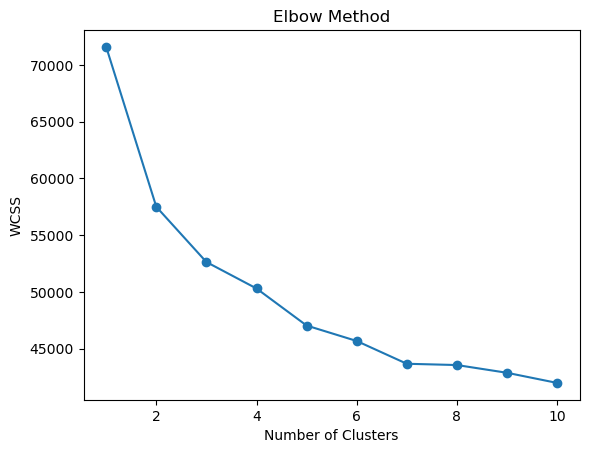

In [202]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(df[num_cols])
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [203]:
kmeans = KMeans(n_clusters=6, init='k-means++', random_state=42)
df['Cluster'] = kmeans.fit_predict(df[num_cols])

In [204]:
cluster_summary = df.groupby('Cluster')[num_cols].mean()
print(cluster_summary)

               ID  Year_Birth    Income   Kidhome  Teenhome   Recency  \
Cluster                                                                 
0       -0.028267   -0.322414 -0.431840  1.184489  0.984159  0.019872   
1        0.028551   -0.722545 -0.173531 -0.819396  0.509465  0.054552   
2        0.026423   -0.065192  0.937338 -0.802342 -0.884653  0.023215   
3        0.034579    0.875436 -0.898456  0.809793 -0.903168 -0.045853   
4       -0.039278    0.166105  1.089100 -0.710192 -0.560051 -0.031997   
5       -0.047520   -0.262987  0.393778 -0.460935  0.821172 -0.010026   

         MntWines  MntFruits  MntMeatProducts  MntFishProducts  ...  Complain  \
Cluster                                                         ...             
0       -0.697489  -0.670143        -0.692025        -0.674238  ...  0.045543   
1       -0.422179  -0.520972        -0.576898        -0.506645  ... -0.060711   
2        0.699349   1.097734         1.440516         1.214109  ... -0.068619   
3       -0

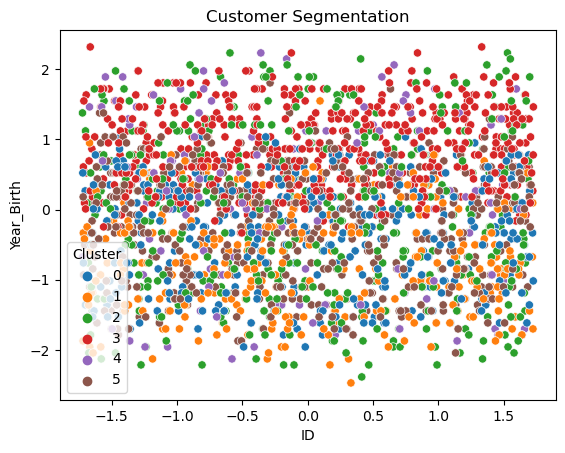

In [205]:
import seaborn as sns
sns.scatterplot(data=df, x=num_cols[0], y=num_cols[1], hue='Cluster', palette='tab10')
plt.title('Customer Segmentation')
plt.show()

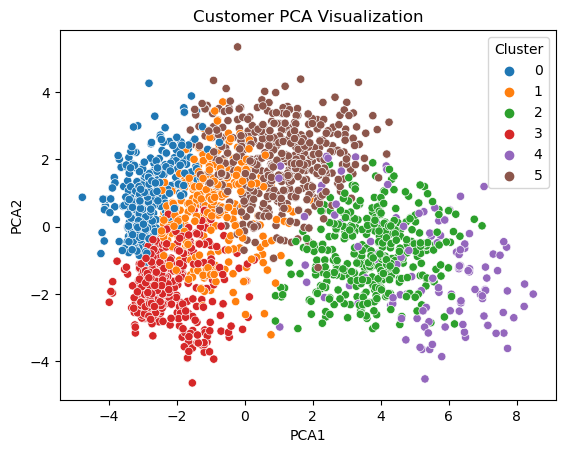

In [206]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_data = pca.fit_transform(df[num_cols])
df['PCA1'], df['PCA2'] = pca_data[:, 0], pca_data[:, 1]

sns.scatterplot(data=df, x='PCA1', y='PCA2', hue='Cluster', palette='tab10')
plt.title('Customer PCA Visualization')
plt.show()

In [207]:
from sklearn.metrics import silhouette_score

# Calculate silhouette score
silhouette_avg = silhouette_score(df[num_cols], df['Cluster'])
print(f"Silhouette Score: {silhouette_avg:.3f}")

Silhouette Score: 0.102


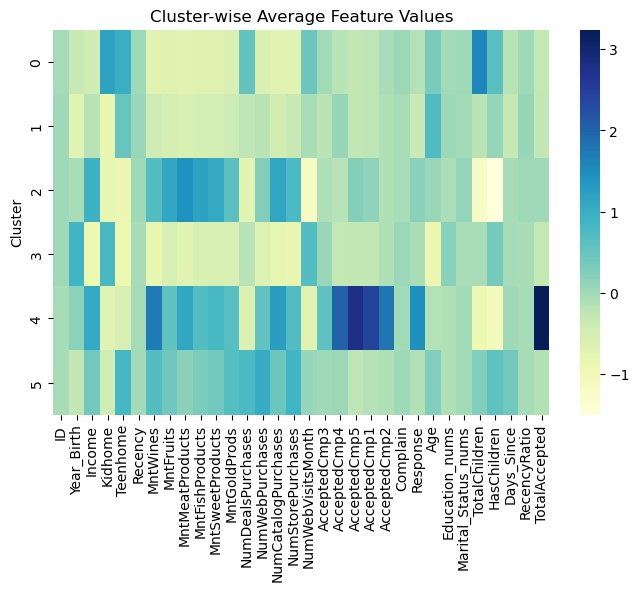

In [208]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
sns.heatmap(cluster_summary, cmap='YlGnBu')
plt.title('Cluster-wise Average Feature Values')
plt.show()

In [209]:
overall_mean = df[num_cols].mean()
for i, row in cluster_summary.iterrows():
    print(f"\nCluster {i}:")
    for col in num_cols:
        print(f"  - Average {col}: {row[col]:.2f}")
    if row[num_cols[0]] > overall_mean[num_cols[0]] and row[num_cols[1]] > overall_mean[num_cols[1]]:
        print("→ High-value customers (High income & high spending)")
    elif row[num_cols[0]] < overall_mean[num_cols[0]] and row[num_cols[1]] < overall_mean[num_cols[1]]:
        print("→ Low-value customers (Low income & low spending)")
    elif row[num_cols[1]] > overall_mean[num_cols[1]]:
        print("→ Impulsive or trend-driven customers (High spending but moderate income)")
    else:
        print("→ Conservative spenders (Moderate income but low spending)")



Cluster 0:
  - Average ID: -0.03
  - Average Year_Birth: -0.32
  - Average Income: -0.43
  - Average Kidhome: 1.18
  - Average Teenhome: 0.98
  - Average Recency: 0.02
  - Average MntWines: -0.70
  - Average MntFruits: -0.67
  - Average MntMeatProducts: -0.69
  - Average MntFishProducts: -0.67
  - Average MntSweetProducts: -0.67
  - Average MntGoldProds: -0.61
  - Average NumDealsPurchases: 0.52
  - Average NumWebPurchases: -0.61
  - Average NumCatalogPurchases: -0.71
  - Average NumStorePurchases: -0.71
  - Average NumWebVisitsMonth: 0.45
  - Average AcceptedCmp3: -0.02
  - Average AcceptedCmp4: -0.20
  - Average AcceptedCmp5: -0.28
  - Average AcceptedCmp1: -0.24
  - Average AcceptedCmp2: -0.07
  - Average Complain: 0.05
  - Average Response: -0.15
  - Average Age: 0.32
  - Average Education_nums: -0.01
  - Average Marital_Status_nums: 0.02
  - Average TotalChildren: 1.56
  - Average HasChildren: 0.63
  - Average Days_Since: -0.18
  - Average RecencyRatio: 0.03
  - Average TotalAcce

In [210]:
df.to_csv('Customer_Segmentation_Final.csv', index=False)
print("Clustered data saved successfully!")


Clustered data saved successfully!


In [228]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import joblib

# Assuming df[num_cols] is your numeric feature dataframe
scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

# Fit KMeans on scaled data
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(df[num_cols])

# Save both scaler and KMeans to disk
joblib.dump(scaler, 'scaler.pkl')
joblib.dump(pca, 'pca.pkl')
joblib.dump(kmeans, 'kmeans.pkl')


['kmeans.pkl']

In [233]:
import streamlit as st
import pandas as pd
import joblib

# --- Load trained models ---
scaler = joblib.load('scaler.pkl')
kmeans = joblib.load('kmeans.pkl')

# --- Feature list ---
num_cols = ['ID', 'Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency',
            'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
            'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases',
            'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
            'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
            'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Response', 'Age',
            'Education_nums', 'Marital_Status_nums', 'TotalChildren', 'HasChildren',
            'Days_Since', 'RecencyRatio', 'TotalAccepted']

st.title("Customer Segmentation Predictor")

#  Input form
with st.form(key='customer_form'):
    user_input = {}
    for col in num_cols:
        # Use sliders for some features, number_input for others
        if 'Age' in col or 'Year_Birth' in col or 'Income' in col or 'Mnt' in col:
            user_input[col] = st.number_input(f"{col}", min_value=0, value=0)
        else:
            user_input[col] = st.number_input(f"{col}", value=0)
    
    submit_button = st.form_submit_button(label='Predict Cluster')

# --- Prediction ---
if submit_button:
    input_df = pd.DataFrame([user_input])
    
    # Scale input
    scaled_input = scaler.transform(input_df[num_cols])
    
    # Predict cluster
    cluster = kmeans.predict(scaled_input)[0]
    
    st.success(f"Predicted customer cluster: {cluster}")
    
    # Check cluster summary
    if not cluster_summary.empty:
        st.write("Cluster characteristics:")
        cluster_info = cluster_summary[cluster_summary['Cluster'] == cluster]
        st.dataframe(cluster_info)
        
        # Optional: bar chart
        features = cluster_info.columns[1:]  # Skip 'Cluster' column
        values = cluster_info.iloc[0, 1:].values
        
        fig, ax = plt.subplots(figsize=(8,4))
        ax.bar(features, values, color='skyblue')
        ax.set_xticklabels(features, rotation=45, ha='right')
        ax.set_title(f"Cluster {cluster} Feature Profile")
        st.pyplot(fig)
    
    # Save clustered data and provide download
    input_df['Cluster'] = cluster
    csv = input_df.to_csv(index=False)
    
    st.download_button(
        label="Download Prediction as CSV",
        data=csv,
        file_name='Customer_Segmentation_Final.csv',
        mime='text/csv'
    )

    st.info("✅ You can download the customer prediction CSV above.")


2025-11-08 19:33:11.464 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-11-08 19:33:11.465 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-11-08 19:33:11.465 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-11-08 19:33:11.466 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-11-08 19:33:11.468 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-11-08 19:33:11.468 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-11-08 19:33:11.469 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-11-08 19:33:11.470 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar